Part I: Applying Image Processing Filters For Image Cartoonifying

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# (1) Read the image
img = cv2.imread('groundtruth.png')
print(img.shape)

(480, 320, 3)


In [4]:
def show_image(img1, img2, title1, title2):
    plt.figure(figsize=(10, 7))
    
    # Show the first image
    plt.subplot(1, 2, 1)
    if len(img1.shape) == 3:  # Color image
        img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
        plt.imshow(img1_rgb)
    else:  # Grayscale image
        plt.imshow(img1, cmap='gray')
    plt.title(title1)
    plt.axis('off')

    # Show the second image
    plt.subplot(1, 2, 2)
    if len(img2.shape) == 3:  # Color image
        img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        plt.imshow(img2_rgb)
    else:  # Grayscale image
        plt.imshow(img2, cmap='gray')
    plt.title(title2)
    plt.axis('off')
    
    plt.show()

(480, 320)


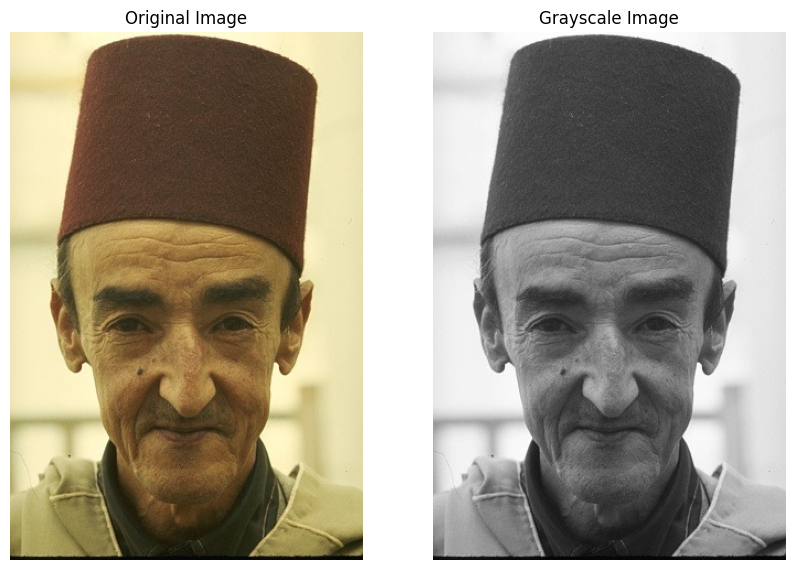

In [ ]:
# (2) Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray_img.shape)

show_image(img, gray_img, "Original Image", "Grayscale Image")


(480, 320)


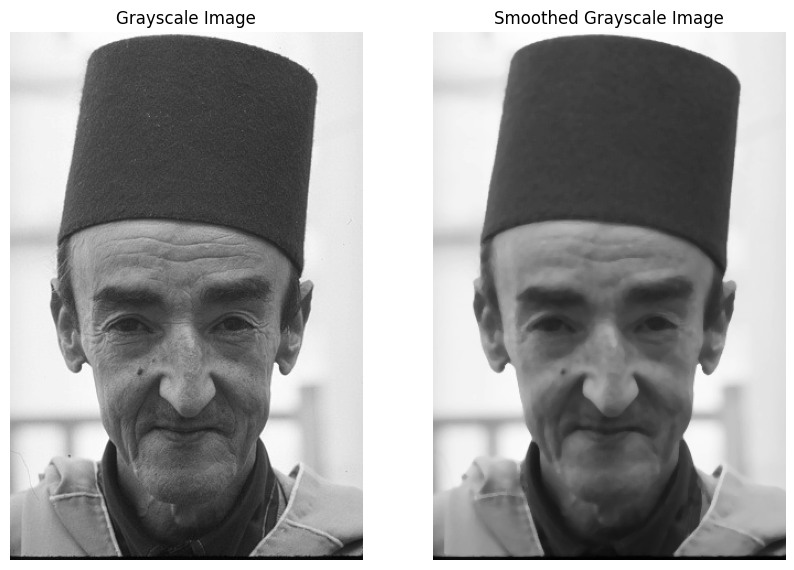

In [18]:
# (3) Apply Median filter of kernel 5x5 to reduce noise in the grayscale image
smoothed_img = cv2.medianBlur(gray_img, 5)
print(smoothed_img.shape)

show_image(gray_img, smoothed_img, "Grayscale Image", "Smoothed Grayscale Image")

(480, 320)


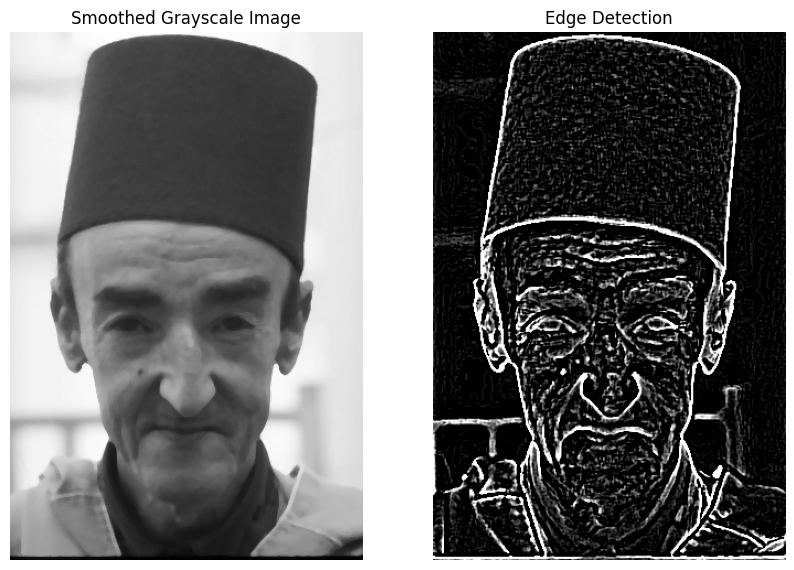

In [19]:
# (4) Apply the Laplacian filter to detect edges
laplacian = cv2.Laplacian(smoothed_img, cv2.CV_8U, ksize=5)
print(laplacian.shape)


show_image(smoothed_img, laplacian, "Smoothed Grayscale Image", "Edge Detection")

(480, 320)


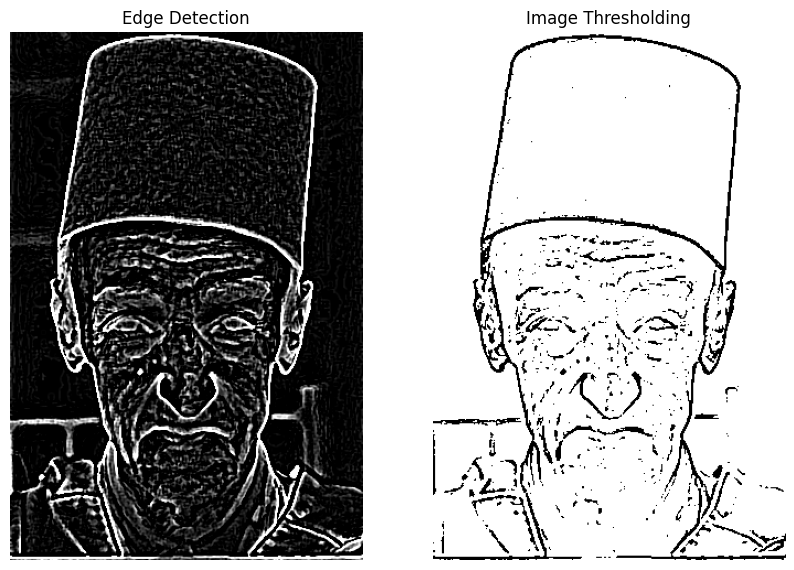

In [ ]:
# (5) Invert the sketch for black edges on a white background:
_, bin_sketch = cv2.threshold(laplacian, 150, 255, cv2.THRESH_BINARY_INV)
print(bin_sketch.shape)

show_image(laplacian, bin_sketch,  "Edge Detection","Image Thresholding")

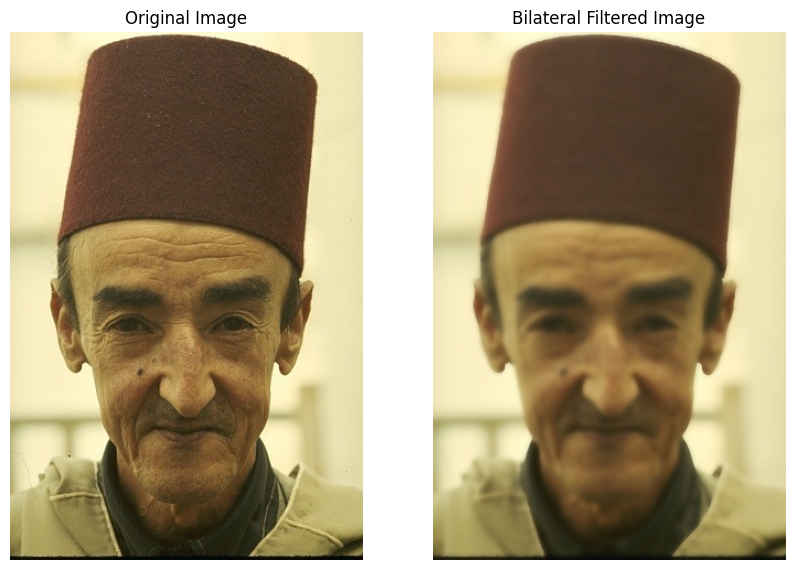

In [21]:
# (6) Apply multiple small bilateral filters directly to the original image
bilateral_filtered= cv2.bilateralFilter(img, d=9, sigmaColor=250, sigmaSpace=250)

show_image(img, bilateral_filtered, "Original Image","Bilateral Filtered Image")

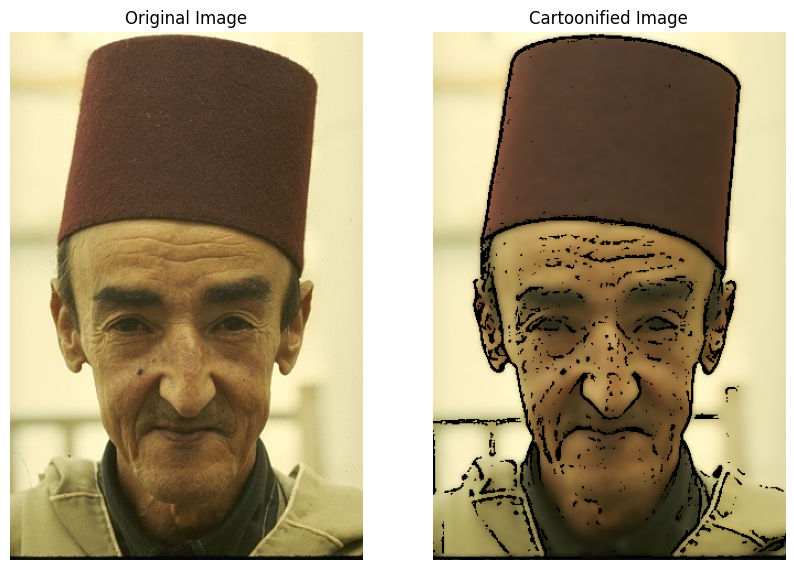

In [22]:
# (7) Combine the edge mask with the bilateral-filtered image to create the cartoon effect
# Convert edges to RGB for bitwise operation

cartoon = cv2.bitwise_and(bilateral_filtered, bilateral_filtered, mask =bin_sketch )  # Overlay the edges onto the smoothed image

show_image(img, cartoon, "Original Image", "Cartoonified Image")